<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to the Central Limit Theorem

_Authors: Matt Brems (DC), Kiefer Katovich (SF), Elaina Hyde (SYD), Justin Pounders (ATL)_

---

### Learning Objectives

- Define and describe sampling distribution.
- Define, describe and compute standard error of the mean.
- Describe the Central Limit Theorem.

### Lesson Guide
- [Review of Sample Statistics and Parameters](#review-statistics-parameters)
- [The Central Limit Theorem](#central-limit-theorem)
- [Visualizing the Central Limit Theorem](#visualizing-clt)
- [Standard Error of a Statistic](#standard-error)
- [Additional Resources](#additional-resources)


In [35]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='review-statistics-parameters'></a>

### Review: Sample Statistics and Parameters

---

Recall that we use sample statistics to estimate population parameters. Our goal is to calculate sample statistics and then rely on properties of a random sample (and perhaps additional assumptions) to make inferences that we can generalize to the larger population of interest.

Below is a table comparing some example sample statistics and population parameters:

Metric  | Statistic  | Parameter 
-------- | ---------- | -------- 
mean   | $$\bar{x} = \frac{\sum x}{n}$$ | $$ \mu = \frac{\sum x}{N} $$      
standard deviation   | $$ s = \sqrt{\frac{\sum_i (x_i - \bar{x})^2}{n-1}} $$ | $$ \sigma = \sqrt{\frac{\sum_i (x_i - \mu)^2}{N} } $$
correlation   | $$ r = \frac{\hat{Cov}(X, Y)}{s_X s_Y} $$ | $$ \rho = \frac{Cov(X, Y)}{\sigma_X \sigma_Y} $$

**Population vs sample**: *What's the difference?*

- A population parameter is **constant** and usually **unknown**.
- A sample statistic is **random** but **known**.

Thought experiment: What is the average height of a female ewok?

![](./images/ewoks.jpeg)

<a id='central-limit-theorem'></a>

### Central Limit Theorem

---

Normality underlies many of the inferential techniques that we will use in this course. It is important for us to determine when we've met the condition of normality.

Consider the random variable $X$. We can take a sample from this population of size $n$ and find the mean of that sample. Let's call this sample mean $x_1$. We can take another sample from this population, also of size $n$, and find the mean of that sample. Let's call this sample mean $x_2$. We can do this over and over until we've calculated the mean of every possible sample of size $n$. If we plotted every sample mean on a histogram, we get another distribution called "the sampling distribution of $\bar{X}$."

**This distribution, the sampling distribution of $\bar{X}$, is Normally distributed even if the distribution of $X$ is not.** (That is, unless some rare conditions are violated).

We can formally define [the central limit theorm](http://homepages.math.uic.edu/~bpower6/stat101/Sampling%20Distributions.pdf) like so:

> In probability theory, the central limit theorem states that, when independent random variables are added, their sum tends toward a normal distribution (commonly known as a bell curve), even if the original variables themselves are not normally distributed. In more precise terms, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables — each with a well-defined (finite) expected value and finite variance — will be approximately normally distributed, regardless of the underlying distribution.

Some properties that arise from the central limit theorem include:

> If $X \sim N(\mu,\sigma)$, then $\bar{X}$ is exactly $N(\mu,\frac{\sigma}{\sqrt{n}})$

> If $X$ is not normally distributed, then $\bar{X}$ is approximately $N(\mu,\frac{\sigma}{\sqrt{n}})$ if the sample size $n$ is at least 30. As $n$ increases, $\bar{X}$ becomes asymptotically normally distributed.

> If $\bar{X}$ is normally distributed, then we can use inferential methods that rely on our sample mean, $\bar{x}$

<a id='visualizing-clt'></a>

### Visualizing the Central Limit Theorem: athlete salary data

---

Below is the path to a `.csv` with a variety of data on today's highest paid athletes. Many of the variables measured in the data set are far from normally distributed. We will show that, despite this fact, the distribution of sample means for these variables will be asymptotically normally distributed, as proven by the Central Limit Theorem.

> **NOTE:** The code below uses the pandas package to load the data into a pandas DataFrame and extract the salary information. If this is unfamiliar, you can safely ignore this part of the code for now.

**We will  now load in the salary data for athletes and extract the total pay information as a variable.**

In [2]:
athletes_csv = 'datasets/Athletes.csv'

import pandas as pd


In [11]:
ath = pd.read_csv(athletes_csv)
ath.head()

,Rank,Name,Sport,Total Pay,Salary/Winnings,Endorsements,Nation,Gender,Year of birth,Birth Date,Place of Birth,Height (cm),Wikipedia Page,dbpedia Page,Image,Description
0,55,Aaron Rodgers,Football,"$22,000,000","$14,500,000","$7,500,000",United States,Male,1983,2/12/1983,"Chico, California, United States",188,http://en.wikipedia.org/wiki/Aaron_Rodgers,dbpedia.org/resource/Aaron_Rodgers,http://commons.wikimedia.org/wiki/Special:File...,"Aaron Charles Rodgers (born December 2, 1983) ..."
1,95,Adam Scott,Golf,"$17,700,000","$8,700,000","$9,000,000",Australia,Male,1980,16/07/1980,"Adelaide, Australia",183,https://en.wikipedia.org/wiki/Adam_Scott_(golfer),dbpedia.org/resource/Adam_Scott_(golfer),http://commons.wikimedia.org/wiki/Special:File...,Adam Derek Scott (born 16 July 1980) is an Aus...
2,60,Adrian Gonzalez,Baseball,"$21,500,000","$21,100,000","$400,000",United States,Male,1982,8/05/1982,"San Diego, California, United States",188,http://en.wikipedia.org/wiki/Adrian_Gonzalez,dbpedia.org/resource/Adrian_Gonzalez,http://commons.wikimedia.org/wiki/Special:File...,"Adrian Gonzalez (born May 8, 1982), also known..."
3,48,Alex Rodriguez,Baseball,"$22,900,000","$22,600,000","$300,000",United States,Male,1975,27/07/1975,New York City,190,http://en.wikipedia.org/wiki/Alex_Rodriguez,dbpedia.org/resource/Alex_Rodriguez,http://commons.wikimedia.org/wiki/Special:File...,"Alexander Emmanuel "" Alex "" Rodriguez (born Ju..."
4,93,Alfonso Soriano,Baseball,"$18,050,000","$18,000,000","$50,000",Dominican Republic,Male,1976,7/01/1976,"San Pedro de Macorís, Dominican Republic",185,http://en.wikipedia.org/wiki/Alfonso_Soriano,dbpedia.org/resource/Alfonso_Soriano,http://commons.wikimedia.org/wiki/Special:File...,"Alfonso Guilleard Soriano (born January 7, 197..."


In [28]:
salary = ath['Total Pay'].values.tolist()

In [38]:
salary = [float(sal.replace("$","").replace(",","")) for sal in salary]

**The list of salary information currently contains strings. Clean the salary list and convert these into floats.**

In [26]:
# Clean the data - convert to float
def clean_sal(sal):
    return float(sal.replace("$","").replace(",",""))

salary = ath['Total Pay'].map(clean_sal)

In [27]:
salary = ath['Total Pay'].map(clean_sal)
salary

0     22000000.0
1     17700000.0
2     21500000.0
3     22900000.0
4     18050000.0
         ...    
95    23400000.0
96    28000000.0
97    18800000.0
98    40400000.0
99    80000000.0
Name: Total Pay, Length: 100, dtype: float64

**Below is a function that will plot a distribution (as a list of numbers). Plot the salary information using this function.**

Is the salary for these athletes normally distributed?

In [36]:
def dist_plotter(sample):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.distplot(sample, bins=50, kde=False)
    plt.show()

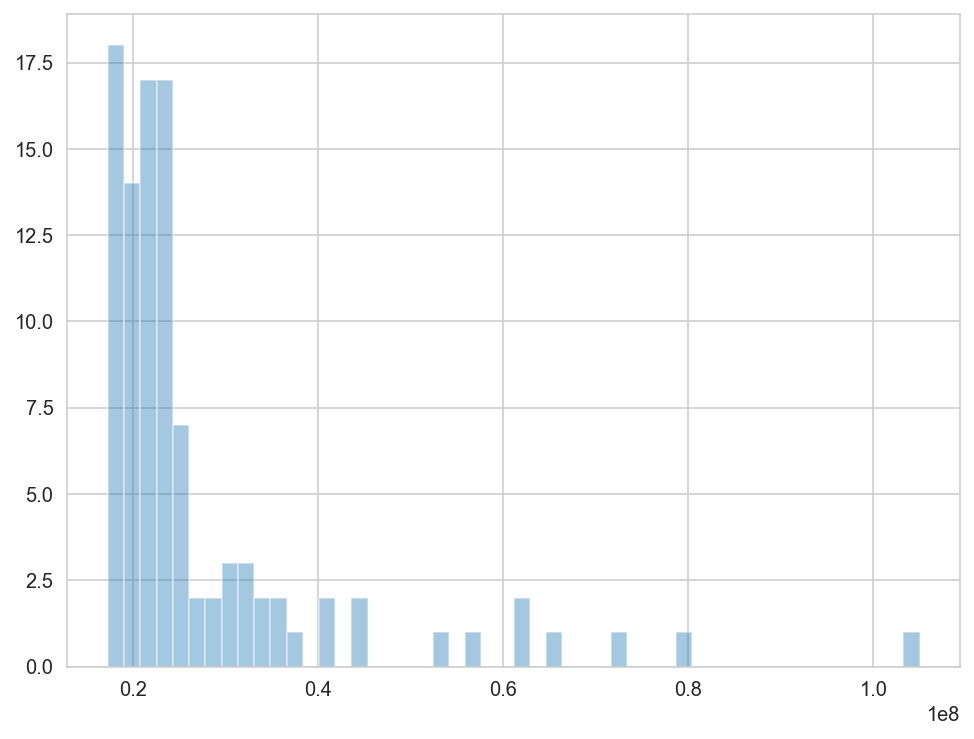

In [39]:
# Plot the salary data:
dist_plotter(salary)

**Write a function that will take a random sample of size $n=30$ from this salary list 1000 times, calculate the means of the samples, and return the sample means as a new list.**

*Hint: you can use `numpy`'s `np.random.choice` to perform your sampling.*

In [40]:
# Write the sample mean function:
def sampler(population, n=30, k =1000):
    sample_means=[]
    for i in range(k):
        sample = np.random.choice(population, size=n, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

In [52]:
samp_means = sampler(salary, 30, 100000)
samp_means

[23681666.666666668,
 24455000.0,
 22855000.0,
 22766666.666666668,
 25809500.0,
 27553333.333333332,
 31883333.333333332,
 28610000.0,
 31245000.0,
 26938333.333333332,
 27896666.666666668,
 28868333.333333332,
 28655666.666666668,
 29750000.0,
 32481666.666666668,
 28150000.0,
 26195000.0,
 24292833.333333332,
 30653333.333333332,
 30563333.333333332,
 27748333.333333332,
 31548333.333333332,
 29856666.666666668,
 26761666.666666668,
 27616666.666666668,
 26707833.333333332,
 28726166.666666668,
 25801666.666666668,
 25714500.0,
 26865666.666666668,
 26693333.333333332,
 27991666.666666668,
 24986166.666666668,
 26410000.0,
 30041666.666666668,
 26241166.666666668,
 29276666.666666668,
 25361666.666666668,
 29791666.666666668,
 31408333.333333332,
 24526666.666666668,
 30911666.666666668,
 26296666.666666668,
 36112333.333333336,
 31732833.333333332,
 21507333.333333332,
 26976666.666666668,
 26056666.666666668,
 28831666.666666668,
 24876666.666666668,
 25634500.0,
 24123333.3333333

**Plot the sample means using the distribution plotter function.**

Is the distribution of sample means approximately normally distributed? What happens if you increase the number of sample means to 10,000? 100,000?

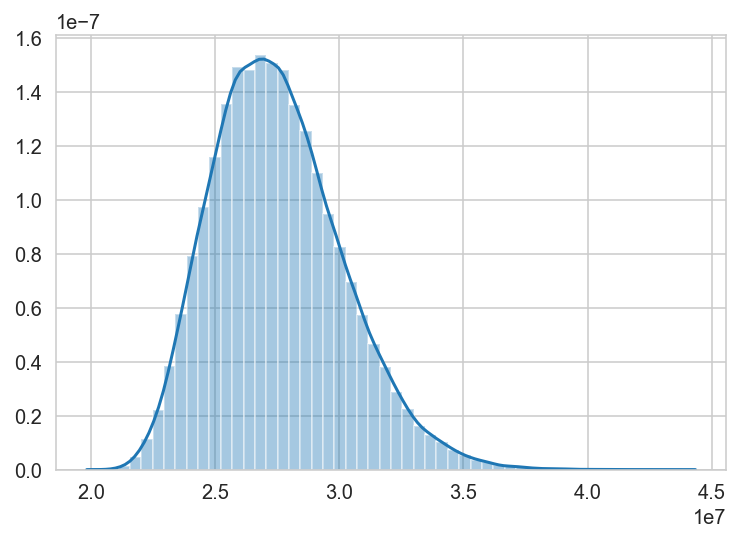

In [47]:
# Plot the sample means
sns.distplot(samp_means)

<a id='standard-error'></a>

### The Standard Error of a Statistic

---

If our goal extends beyond simply describing the data we have, and we instead want to infer something about the overall population based on the information in this sample, we will inherently have some degree of uncertainty.

**Uncertainty About the True Value**

Working within the Frequentist framework, we know that there is a true value for the mean salary of athletes. If we had surveyed every single athlete and calculated the mean, then we would have that value: the true population mean. However, we have only measured 100 athletes' salaries at random. Depending on our sample size, we will have some degree of uncertainty about how far off our statistic of our random sample is from the true parameter. This distance is our measurement "error."

**The Mean vs. The Standard Deviation vs. The Standard Error**

It is important to frame these definitions in the context of *repeated measurements*. Furthermore, as Frequentists, we conceive of this sample as one of many hypothetical random samples from the same overall population. Let's start with our calculated statistic, the mean age.

> **Mean:** Our sample mean age is the estimate of the true mean age of the overall population.

We also calculated the standard deviation of ages in our sample.

> **Standard deviation:** This quantifies the spread of our data — i.e., the average distance of an observation from the mean. If we were to repeat a measurement, it would quantify our certainty about how far that age will be from the mean age.

Lastly, we have the standard error of our mean. Whereas the standard deviation is a measure of the spread of our data, the standard error is a measure of spread in our calculated statistic. In other words, the standard error is the standard deviation of our statistic.

> **Standard error:** If you had a new random sample of ages that was the same size as the original, the standard error would quantify our certainty about how far the new sample mean would be from the original sample mean.

The calculation for the standard error of the sample mean is:

### $$ SE_{\bar{x}} = \frac{s_{x}}{\sqrt{n}} $$

Here, $s_{x}$ is the sample standard deviation and $n$ is the sample size.

To recap:

- We want to investigate random variable, $x$ (salary).
- There is a "true" population mean, $\mu$ (mean salary for all athletes).
- We collect a sample and calculate the sample mean, $\bar{x}$ (mean salary for the athletes we queried).
- The sample mean ($\bar{x}$) is a random variable!  It therefore has an associated probability distribution.
- The probability distribution of the sample mean is called the *sampling distribution*.
- If the sample size is large enough, the sampling distribution of the mean will be approximately a normal distribution. (This is called the central limit theorem.)
- The standard deviation of the sampling distribution is called the standard error.

**Now, let's manually calculate the standard error of the sample mean for our salaries.**

In [48]:
mean_salary = np.mean(salary)

In [54]:
stand_error = np.std(samp_means)/np.sqrt(30)
stand_error

475315.2241338497

<a id='additional-resources'></a>

### Additional resources

---

http://blog.vctr.me/posts/central-limit-theorem.html

http://www.usablestats.com/lessons/central_limit

http://blog.minitab.com/blog/michelle-paret/explaining-the-central-limit-theorem-with-bunnies-and-dragons-v2
